# Annotations comparison

The aim of this note book is to compare different annotations of a same piece, the first movement of Beethoven sonatas, using the different metrics developed : the binary, SPS, voice leading and tone by tone metrics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

from glob import glob
from fractions import Fraction
from math import *

import sys
sys.path.append('../python_scripts')

from metric import get_distance
from progression import get_progression, plot_comparison
from data_types import ChordType,PitchType
from constants import TRIAD_REDUCTION
from utils import get_chord_pitches

## Beethoven sonatas annotations comparison

Here two sets of annotation of the first movement of Beethoven sonatas are compared : the dcml and the fh annotations.

In [2]:
sonata = pd.read_csv('../Data/sonata_comparisons.csv', converters={'number': str})
sonata.set_index('number', inplace = True)

sonata['avg_sps_normalized'] = (sonata['average_sps']-np.mean(sonata['average_sps']))/np.std(sonata['average_sps'])
sonata['avg_vl_normalized'] = (sonata['average_vl']-np.mean(sonata['average_vl']))/np.std(sonata['average_vl'])
sonata['avg_tbt_normalized'] = (sonata['average_tbt']-np.mean(sonata['average_tbt']))/np.std(sonata['average_tbt'])
sonata['avg_bin_normalized'] = (sonata['average_bin']-np.mean(sonata['average_bin']))/np.std(sonata['average_bin'])

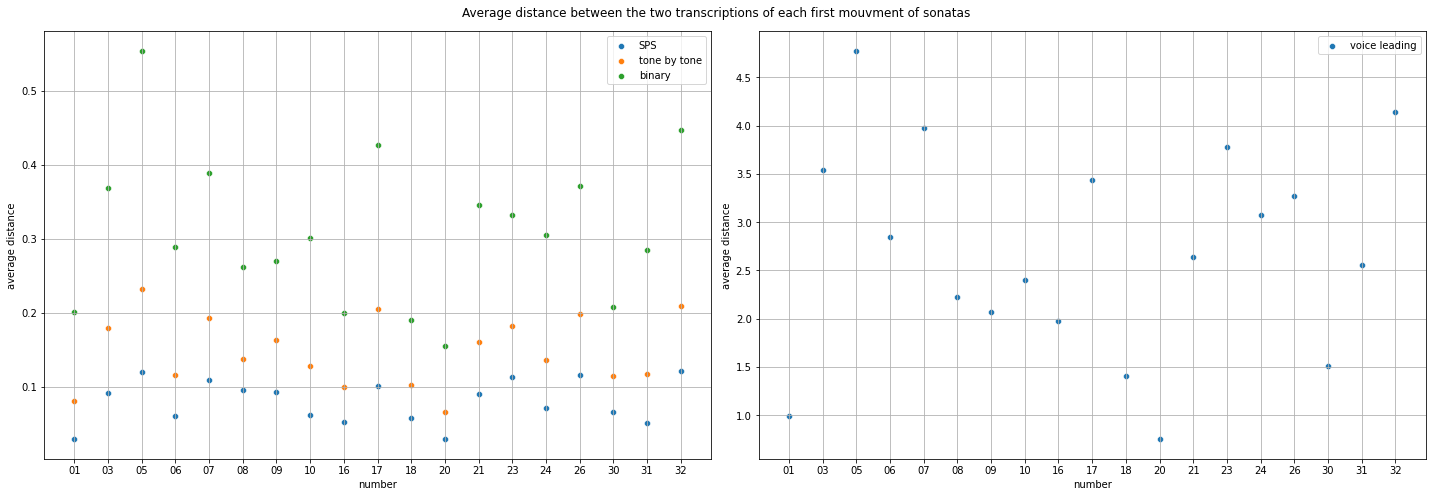

In [3]:
fig, axs = plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(data=sonata, x='number', y='average_sps',ax=axs[0], label='SPS')
sns.scatterplot(data=sonata, x='number', y='average_tbt',ax=axs[0], label='tone by tone')
sns.scatterplot(data=sonata, x='number', y='average_bin',ax=axs[0], label='binary')
sns.scatterplot(data=sonata, x='number', y='average_vl',ax=axs[1], label='voice leading')
axs[0].grid()
axs[0].set(xlabel='number', ylabel='average distance')
axs[1].grid()
axs[1].set(xlabel='number', ylabel='average distance')


fig.suptitle('Average distance between the two transcriptions of each first mouvment of sonatas');
fig.tight_layout()

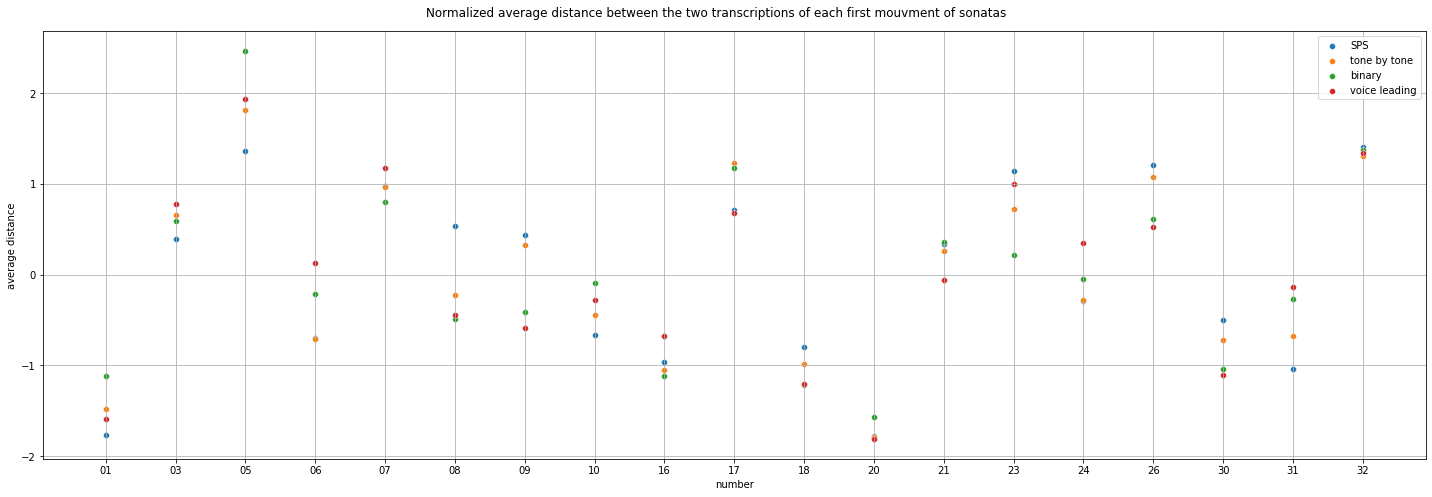

In [4]:
fig, axs = plt.subplots(1,1,figsize=(20,7))

sns.scatterplot(data=sonata, x='number', y='avg_sps_normalized',ax=axs, label='SPS')
sns.scatterplot(data=sonata, x='number', y='avg_tbt_normalized',ax=axs, label='tone by tone')
sns.scatterplot(data=sonata, x='number', y='avg_bin_normalized',ax=axs, label='binary')
sns.scatterplot(data=sonata, x='number', y='avg_vl_normalized',ax=axs, label='voice leading')
axs.grid()
axs.set(xlabel='number', ylabel='average distance')


fig.suptitle('Normalized average distance between the two transcriptions of each first mouvment of sonatas');
fig.tight_layout()

___

## Discrepancies visualization

One can visualize the discrepancies between two annotations of a given piece. The x-axis represents the time and is given in whole note.

In [5]:
nb = 17
nb = str(nb) 
nb = nb if len(nb)>1 else '0'+ nb 

progression =  pd.read_csv('../Data/Beethoven_sonata_progression/' + nb + '-1.csv')

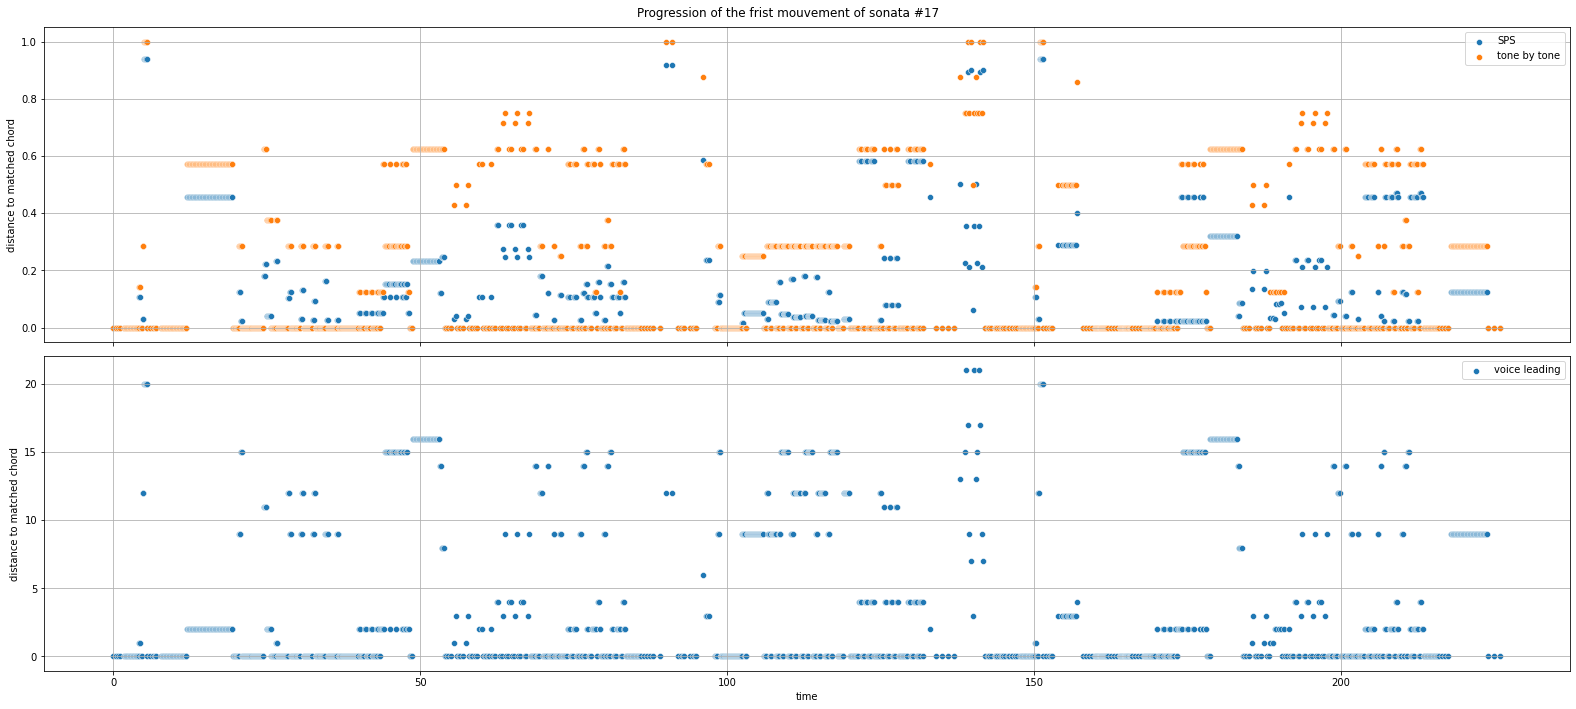

In [6]:
title = 'Progression of the frist mouvement of sonata #'+nb
plot_comparison(progression=progression, title=title)

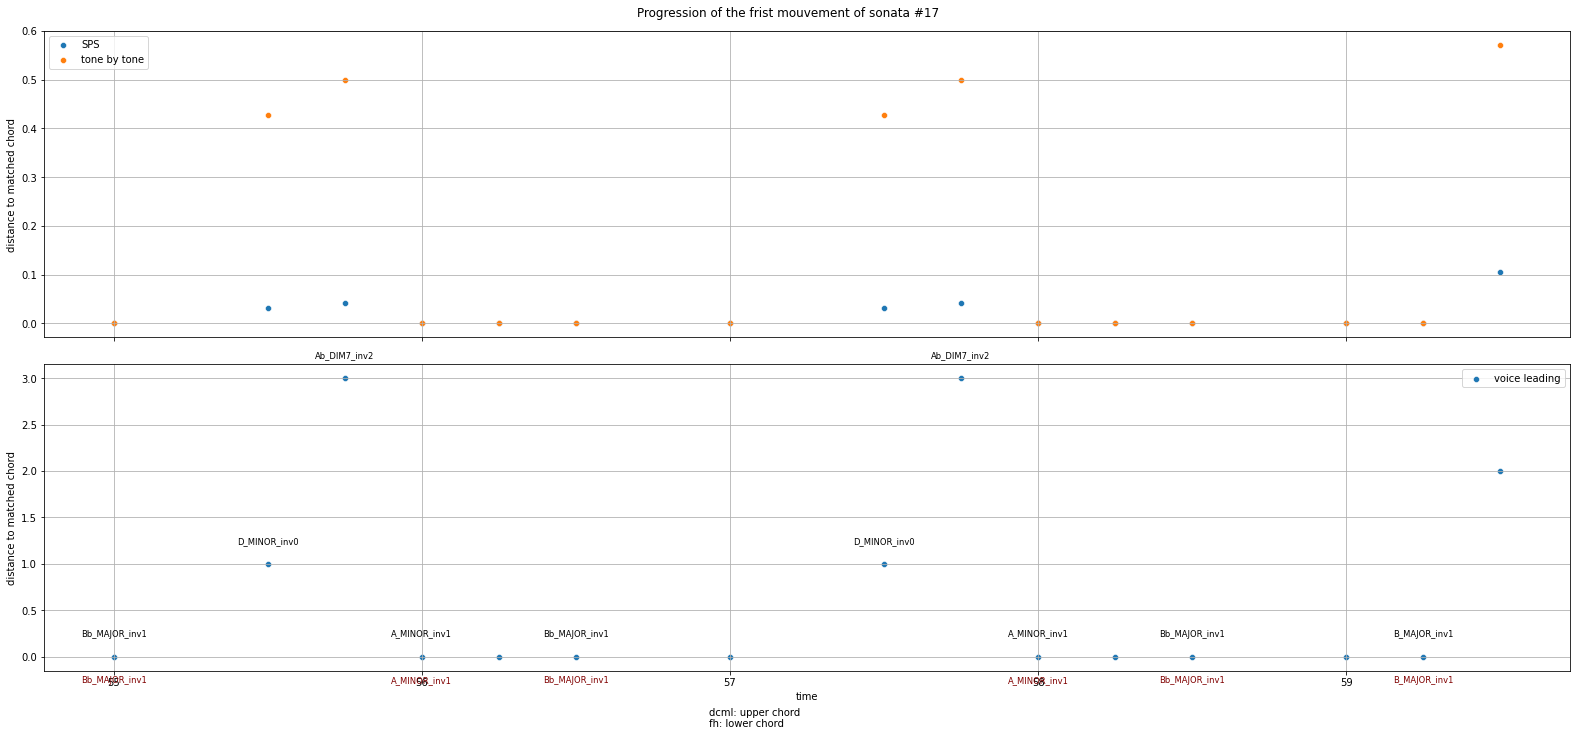

In [7]:
plot_comparison(progression=progression,rge=[55,60], verbose=True, title=title, annotation1='dcml', annotation2='fh')